In [1]:
import numpy as np
import matplotlib.pyplot as plt

The Numerov algorithm can solve linear second differential equations (like hydrogen Schrodinger eqution's)

$\frac{d^2 y}{dx^2} + k^2(x) y = s(x)$

For wave functions of the form $\phi(\vec(r)) = \frac{R(r)}{r} Y_{lm}(\Omega) $

$k^2(r) = \frac{2m}{\hbar^2} \Big( E - \frac{l(l+1) \hbar^2}{2mr^2} - V(r) \Big)$

The Numerov algorithm:

$ \frac{\Delta x^2}{12} \Big[ s_{n+1} + 10s_{n} + s_{n-1} \Big] = \Big(1 + \frac{\Delta x^2 k^2_{n+1}}{12} \Big)y_{n+1} -2 \Big(1 - \frac{5 \Delta x^2 k^2_{n}}{12} \Big)y_{n} + \Big(1 + \frac{\Delta x^2 k^2_{n-1}}{12} \Big)y_{n-1} + O(\Delta x^6)$

To start the algorithm 2 conditions are needed $y_0$ and $y_1$

### Exercise 3.1 Computational physics Koonin

Using Numerov algorithm to solve $\frac{d^2 y}{dx^2} = -4 \pi^2 y$ with the conditions $y(0) = 1$ and $y'(0) = 0$ from $x=0$ to $x=1$

##### Solution

First we need to find $y( \Delta x)$ for that we use the Taylor expantion around $x=0$ up to $\Delta x^2$

$y( \Delta x) = y(0) + y'(0) \Delta x + O(\Delta x^2)$ 

$C(\Delta x, q) = \Big(1 +  \frac{q  \Delta x^2  4 \pi^2}{12} \Big)$

$y_{n+1}= \frac{2C(\Delta x, 5)y_n - C(\Delta x, 1)y_{n-1}}{C(\Delta x, 1)}$

In [24]:
def C(Delta_x, q=1.0):
    return (1.0 + (q*4.0*(np.pi**2.0)*(Delta_x)**2.0)/12.0)

x_min=0.0
x_max=1.0
Delta_x=0.015
y=[]

y.append(1.0)

y.append(1.0 + 0.0*Delta_x)

N= int((x_max - x_min)/Delta_x)
print(N)
for n in range(2, N):
    y.append(((2.0*C(Delta_x,-5.0)*y[n-1] - C(Delta_x,1)*y[n-2])/(C(Delta_x))))

66


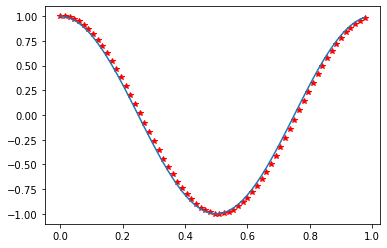

In [25]:
x_arra= np.array([n*Delta_x for n in range(N)])
y_true= np.cos(2.0*np.pi*x_arra)
plt.plot(x_arra, y, 'r*', x_arra, y_true)